
<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/04_preprocesamiento_sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit Learn

Desde hace años, Scikit Learn es el estándar de facto en términos de paquetes de utilidades y algoritmos de aprendizaje automático. Si bien en los últimos tiempos, tanto en gradient boosting como en deep learning, han surgido otros paquetes que son más populares en determinados contextos, esta librería sigue teniendo toda la funcionalidad de soporte para desarrollar y automatizar procesos de entrenamiento y predicción.

Iremos viendo este paquete de una manera funcional, a través de las tareas propias de un proceso de desarrollo e implementación de aprendizaje automático.

#### *Nota sobre la API de sklearn*: la gran mayoría de algoritmos y utilidades son clases que se instancia llamándola como una función con parámetro de inicialización y luego tiene dos métodos, `fit` para entrenar el algoritmo y `transform` o `predict` para aplicarlo, según el caso y la utilidad. Existen algunas funciones simples también para funcionalidades más sencillas. 

## 1. Pre-procesado

Luego de la lectura de datos que ya vimos con `Pandas`, la primera tarea de manipulación de datos suele ser el preprocesador, que consiste en la transformación de los datos para que sean procesables y/o más compatibles con el algoritmo elegido o incluso que le permitan más poder explicativo.

Las transformaciones para lograr que -algunos algoritmos- puedan procesar los datos son la `asignación de nulos` y, en menor medida, la `codificación de variables no intervalares (categóricas y ordinales) `; mientras que el `escalado y normalización` tiene a lograr una mejor compatibilidad con ciertos modelos. Por otro lado, la creación de variables, aunque contiene una gran parte de arte, es una forma muy potente de agregar poder explicativo al modelo.

Veremos estas técnicas en el orden lógico de su utilización, aunque algunas, particularmente las que operan sobre columnas independientes como el escalado y la codificación, son intercambiables.

Asimismo, existen algunas técnicas como la discretización (bins) o la transformación binaria que ya no se usan a menudo; al igual que técnicas de detección de valores extremos (`outliers`) y reducción de dimensionalidad que no tienen a tener ya los mismos beneficios que en otras épocas con menos capacidad de cálculo y algoritmos menos sofisticados. 

### A.- Asignación de nulos o perdidos

Excepto alguna implementación de `gradient boosting`, todos los algoritmos de aprendizaje automático son incompatibles con la existencia de nulos en el dataset. 

Con los valores perdidos hay que ser especialmente cuidadoso, porque a veces tienen de por si un sentido, es decir que no son al azar. Si es así, hay que buscar una forma lógica de completarlos. Si no, se pueden completar de alguna formas distintas.
# SKLearn

Desde hace años, scikit Learn es el estándar de facto en términos de paquetes de utilidades y algoritmos de aprendizaje automático. Si bien en los últimos tiempos, tanto en gradient boosting como en deep learning, han surgido otros paquetes que son más populares en determinados contextos, esta librería sigue teniendo toda la funcionalidad de soporte para desarrollar y automatizar procesos de entrenamiento y predicción.

Iremos viendo este paquete de una manera funcional, a través de las tareas propias de un proceso de desarrollo e implementación de aprendizaje automático.

#### *Nota sobre la API de sklearn*: la gran mayoria de algoritmos y utilidades son clases que se instancia llamandola como una función con parámetro de inicialización y luego tiene dos métodos, `fit` para entrenar el arlgoritmo y `transform` o `predict` para aplicarlo, según el caso y la utilidad. Existen algunas funciones simples tambien para funcioanlidades mas sencillas. 

## 1. Pre-procesado

Luego de la lectura de datos que ya vimos con `Pandas`, la primera tarea de manipuación de datos suele ser el pre-procesado, que consiste en la transformación de los datos para que sean procesables y/o más compatibles con el algoritmo elegido o incluso que le permitan más poder explicativo.

Las transformaciones para lograr que -algunos algoritmos- puedan procesar los datos son la `asignación de nulos` y, en menor medida, la `codificación de variables no intervalares (categóricas y ordinales)`; mientras que el `escalado y normalización` tiene a lograr una mejor compatibilidad con ciertos modelos. Por otro lado, la creación de variables, aunque contiene una gran parte de arte, es una forma muy potente de agregar poder explicativo al modelo.

Veremos estas técnicas en el orden lógico de su utilización, aunque algunas, particularmente las que operan sobre columnas independientes como el escalado y la codificación, son intercambiables.

Asimsimo, existen algunas tecnicas como la discretización (bins) o la binarización que ya no se usan a menudo; al igual que técnicas de detección de valores extremos (`outliers`) y reducción de dimensionalidad que no tienen a tener ya los mismos beneficios que en otras epocas con menos capacidad de calculo y algoritmos menos sofisticados. 

### A.- Asignación de nulos o perdidos

Excepto alguna implementaciones de `gradient boosting`, todos los algoritmos de aprendizaje automático son incompatibles con la existencia de nulos en el dataset. 

Con los valores perdidos hay que ser especialmente cuidadoso, porque a veces tienen de por si un sentido, es decir que no son al azar. Si es asi, hay que buscar una forma lógica de completarlos. Si no, se pueden completar de alguan formas distintas.



In [1]:
import numpy as np
import pandas as pd
X = pd.DataFrame([
    [1,2,3,np.nan],
    [np.nan, np.nan, np.nan, 0],
    [-5, 0, 25, np.nan],
    [1,-1, np.nan, np.nan]
], columns=[f"c{i}" for i in range(4)])
X

,c0,c1,c2,c3
0,1.0,2.0,3.0,NaN
1,NaN,NaN,NaN,0.0
2,-5.0,0.0,25.0,NaN
3,1.0,-1.0,NaN,NaN


Podemos eliminar filas o columnas completas cuando posean muchos nulos usando `dropna`

Con `axis` definimos si se aplica sobre filas o columnas

Con `thresh` a partir de cuantos nulos consideramos que debe borrarse (cuidado que inicia en 0)

In [2]:
X.dropna(axis=0, thresh=2)

,c0,c1,c2,c3
0,1.0,2.0,3.0,NaN
2,-5.0,0.0,25.0,NaN
3,1.0,-1.0,NaN,NaN


In [3]:
Con `axis = 1` eliminamos por columna en lugar de fila

SyntaxError: invalid syntax (<ipython-input-3-8c6427e8d029>, line 1)

In [4]:
X.dropna(axis=1, thresh=2)

,c0,c1,c2
0,1.0,2.0,3.0
1,NaN,NaN,NaN
2,-5.0,0.0,25.0
3,1.0,-1.0,NaN


Con `fillna` podemos completar con algun valor constante

Es recomendable utilizar algún valor fuera del rango de valores de la variable para que se identifique claramente que era perdido

In [5]:
X.fillna(999)

,c0,c1,c2,c3
0,1.0,2.0,3.0,999.0
1,999.0,999.0,999.0,0.0
2,-5.0,0.0,25.0,999.0
3,1.0,-1.0,999.0,999.0


Con `SimpleImputer` podemos remplazarlo usando una función de agregación, como por ejemplo:


*   mean: La Media
*   median: La Mediana
*   most_frequent: Valor más frecuente
*   constant: un valor constante




In [ ]:
from sklearn.impute import SimpleImputer

#media
SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)

array([[ 1.        ,  2.        ,  3.        ,  0.        ],
       [-1.        ,  0.33333333, 14.        ,  0.        ],
       [-5.        ,  0.        , 25.        ,  0.        ],
       [ 1.        , -1.        , 14.        ,  0.        ]])

In [ ]:
X

array([[ 1.        ,  2.        ,  3.        ,  0.        ],
       [-1.        ,  0.33333333, 14.        ,  0.        ],
       [-5.        ,  0.        , 25.        ,  0.        ],
       [ 1.        , -1.        , 14.        ,  0.        ]])

In [ ]:
#media
SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(X)

Con `IterativeImputer` podemos entrenar un modelo para realizar la imputación

Por default, utiliza un modelo de regresión de tipo Bayesian Ridge

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#con un modelo
IterativeImputer(max_iter=10, random_state=0).fit_transform(X)

array([[ 1.        ,  2.        ,  3.        ,  0.        ],
       [-1.        ,  0.33333333, 11.43333335,  0.        ],
       [-5.        ,  0.        , 25.        ,  0.        ],
       [ 1.        , -1.        ,  6.30000006,  0.        ]])

También podemos crear una Matriz de nulos utilizando `MissingIndicator`

In [ ]:
from sklearn.impute import MissingIndicator

MissingIndicator(missing_values=999).fit_transform(X.fillna(999))

array([[False, False, False,  True],
       [ True,  True,  True, False],
       [False, False, False,  True],
       [False, False,  True,  True]])

### B.- Codificación de variables ordinales y categorías

Los algoritmos no pueden procesar datos que formato texto o `string`, hay que transformarlos a números. Existen algunas opciones para codificar estas variables, dependiendo de su naturaleza. 

Si son ordinales, fácilmente se pueden traducir a número, en una escala arbitraria y solo manteniendo los ordenes y valores equidistantes. 

Si son categóricas, no es posible hacer lo mismo. Algunas implementaciones de gradient boosting toleran variables categorías, pero en general los demás no. Así que hay que omitirlas o transformarlas.



In [ ]:
X = pd.DataFrame([
    ['M', 'CABA', 'medio'],
    ['M', 'CABA', 'alto'],
    ['F', 'PBA', 'alto'],
    ['F', 'Córdoba', 'bajo'],
    ['F', 'Córdoba', "medio"]
], columns=["sexo", "provincia", "ingreso"])
X

,sexo,provincia,ingreso
0,M,CABA,medio
1,M,CABA,alto
2,F,PBA,alto
3,F,Córdoba,bajo
4,F,Córdoba,medio


Con `OrdinalEncoder` podemos crear variables codificadas de forma ordinal en orden alfabético

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

OrdinalEncoder().fit_transform(X[["sexo", "ingreso"]])

NameError: ignored

In [ ]:
OrdinalEncoder().fit_transform(X[["sexo", "ingreso"]].sort_values("sexo"))

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [1., 0.]])

También puedo indicarle el orden que deseo que codifique, si existe una lógica de magnitud para esa variable que no sea el orden alfabético

In [ ]:
encoder = OrdinalEncoder(categories=[["F", "M"], ["bajo", "medio", "alto"]])
encoder.fit_transform(X[["sexo", "ingreso"]])

array([[1., 1.],
       [1., 2.],
       [0., 2.],
       [0., 0.],
       [0., 1.]])

In [ ]:
X

,sexo,provincia,ingreso
0,M,CABA,medio
1,M,CABA,alto
2,F,PBA,alto
3,F,Córdoba,bajo
4,F,Córdoba,medio


In [ ]:
encoder.categories

[['F', 'M'], ['bajo', 'medio', 'alto']]

In [ ]:
pd.factorize(X.sexo)

(array([0, 0, 1, 1, 1]), Index(['M', 'F'], dtype='object'))

También puedo usar `OneHotEncoder` para realiza una codificación dummy o de tipo one-hot, es decir, donde cada valor de la variable se convierte en una columna con un binario que es 1 en caso de que tome ese valor

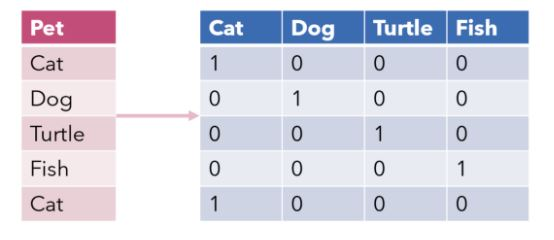

In [ ]:
OneHotEncoder().fit_transform(X[["sexo", "ingreso"]])

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
OneHotEncoder().fit_transform(X).toarray()

array([[0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
X

,sexo,provincia,ingreso
0,M,CABA,medio
1,M,CABA,alto
2,F,PBA,alto
3,F,Córdoba,bajo
4,F,Córdoba,medio


In [ ]:
encoder = OneHotEncoder().fit(X)
pd.DataFrame(encoder.transform(X).toarray(), columns=[c for cc in encoder.categories_ for c in cc])

,F,M,CABA,Córdoba,PBA,alto,bajo,medio
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pd.DataFrame(encoder.transform(X).toarray(),
            columns=[
                f"{column}_{category}" for categories, column in zip(encoder.categories_, X.columns)
                for category in categories
            ])

,sexo_F,sexo_M,provincia_CABA,provincia_Córdoba,provincia_PBA,ingreso_alto,ingreso_bajo,ingreso_medio
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### C.- Escalado y normalización

En casi todos los algoritmos basados en algebra (regresiones y redes neuronales), los parámetros del modelo se encuentran con alguna variante de `gradient descent` y por tanto adolecen se sensibilidad a la escala de los parámetros. Por ello, tiende a ser útil llevar a todas las variables a un rango parejo. Esto normalmente se logra con el escalado de cada columna para que estén en el mismo rango o tengan media y desvíos igual.



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer


X = pd.DataFrame([
    [1,-200,30000],
    [2, 100, 50000],
    [5,0, 100000]
], columns=[f"c{i}" for i in range(3)])
X

,c0,c1,c2
0,1,-200,30000
1,2,100,50000
2,5,0,100000


Con `StandardScaler` podemos transformar las variables a valores con media 0 y varianza 1

In [ ]:
StandardScaler().fit_transform(X)

In [ ]:
StandardScaler().fit_transform(X).mean(axis=0).round(10)

In [ ]:
StandardScaler().fit_transform(X).std(axis=0)

También podemos escalarlos entre un valor mínimo y máximo, que por default es 0 y 1 usando `MinMaxScaler`

In [ ]:
MinMaxScaler().fit_transform(X)

Y con `MaxAbsScaler` podemos escalarlo por el máximo valor absoluto, es decir, haciendo 1 el valor máximo (en terminos absolutos)

In [ ]:
MaxAbsScaler().fit_transform(X)

La normalización es similar pero actua a nivel fila, y se usa cuadno vamos a usar algoritmos que miden distancias entre vectores


In [ ]:
Normalizer().fit_transform(X)

In [ ]:
X

In [ ]:
Normalizer().fit_transform(StandardScaler().fit_transform(X))

In [ ]:
transformada = Normalizer().fit_transform(StandardScaler().fit_transform(X))
np.square(transformada)

In [ ]:
np.square(transformada).sum(axis=1)

### Creación de Variables (Feature Engineering)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = pd.DataFrame([
    [1,-20],
    [2, 10],
    [5,0]
], columns=[f"c{i+1}" for i in range(2)])

print(X)

pd.DataFrame(PolynomialFeatures().fit_transform(X),
             columns=["1", "c1", "c2", "c1^2", "c1*c2", "c2^2"])

# Ejercitación

### Leer los datos del titanic y transformarlos para lograr el mejor valor de la siguiente funcion

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

Creamos una función para calcular el resultado de un modelo simple de Regresión Logística

In [8]:
def metric(X):
    X_train, X_test, y_train, y_test = train_test_split(X.drop("Survived", axis=1), X["Survived"],
                                                        test_size=0.25, random_state=42)
    model = LogisticRegressionCV()
    model.fit(X_train, y_train)
    return log_loss(y_test,  model.predict_proba(X_test)), accuracy_score(y_test,  model.predict(X_test)), roc_auc_score(y_test,  model.predict(X_test))

Leemos los Datos

In [92]:
try:
    data = pd.read_csv("../data/titanic.csv", index_col="PassengerId")
except:
    data = pd.read_csv("https://raw.githubusercontent.com/Argentan/DMA_LAB2/master/data/titanic.csv", index_col="PassengerId")

Esta es la métrica base, sin hacer nada más que permitir que el modelo corra

In [10]:
metric(data.fillna(99999).drop(data.select_dtypes("O"), axis=1))

(0.6452636223837003, 0.6591928251121076, 0.5956733187992621)

Vemos el resultado de estas métricas si predijeramos todos ceros (nadie sobrevive)

In [13]:
accuracy_score(data["Survived"],  np.zeros(data.shape[0]))

0.6161616161616161

In [153]:
roc_auc_score(data["Survived"],  np.zeros(data.shape[0]))

0.5

Vemos los Nulos en las Variables

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Vemos las variables de tipo Categóricas

In [14]:
data.select_dtypes("O")

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


Otras características a estudiar:

In [15]:
data.Cabin.fillna("NA").value_counts()

NA             687
C23 C25 C27      4
G6               4
B96 B98          4
F2               3
              ... 
E36              1
A23              1
A14              1
A5               1
A24              1
Name: Cabin, Length: 148, dtype: int64

In [16]:
data.Cabin.str[0].fillna("NA").value_counts()

NA    687
C      59
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin, dtype: int64

In [20]:
data.Name.str.split(",")

PassengerId
1                             [Braund,  Mr. Owen Harris]
2      [Cumings,  Mrs. John Bradley (Florence Briggs ...
3                              [Heikkinen,  Miss. Laina]
4        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
5                            [Allen,  Mr. William Henry]
                             ...                        
887                             [Montvila,  Rev. Juozas]
888                      [Graham,  Miss. Margaret Edith]
889          [Johnston,  Miss. Catherine Helen "Carrie"]
890                             [Behr,  Mr. Karl Howell]
891                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [21]:
data.Name.str.split(",").str[0].value_counts()

Andersson    9
Sage         7
Johnson      6
Panula       6
Skoog        6
            ..
Bengtsson    1
Hawksford    1
Givard       1
Jalsevac     1
Cumings      1
Name: Name, Length: 667, dtype: int64

In [23]:
import pandas as pd

Consejos Adicionales para explorar:
*    Analizar los valores vacios `""`. Se puede asimilar a un Nulo?
*    Analizar los valores cero `0`. Se puede asimilar a un Nulo?
*    Se pueden agrupar pasajeros en grupos? Por ejemplo: Familia
*    A partir de la edad, podemos crear una variable que mejore la separación del modelo?
*    Se puede crear una variable "Madre"?
*    Mejora el modelo si Normalizamos las variables continuas?
*    Y si convertimos variables continuas en Rangos Fijos?

In [24]:
data_1 = data.copy()

In [25]:
#NULOS
data_1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

#media
imputar_edad=SimpleImputer(missing_values=np.nan, strategy='mean')
data_1['Age'] = imputar_edad.fit_transform(data_1['Age'].values.reshape(-1, 1))

In [27]:
#Metrica Inicial
metric(data.fillna(99999).drop(data.select_dtypes("O"), axis=1))

(0.6452636223837003, 0.6591928251121076, 0.5956733187992621)

In [28]:
#Metrica con edad Imputada. Mejora
metric(data_1.drop(data_1.select_dtypes("O"), axis=1))

(0.5754307380381881, 0.7443946188340808, 0.6986416233439544)

In [29]:
data_2 = data_1.copy()

In [30]:
# COMPLETAR CON UN NUMERO ALTO LOS NA EN EMBARKED

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

data_2[['Embarked']]=data_2[['Embarked']].fillna(999)

In [31]:
# COMPLETANDO LOS NA DE EMBARKD NO MEJORA
metric(data_2.drop(data_2.select_dtypes("O"), axis=1))

(0.5754307380381881, 0.7443946188340808, 0.6986416233439544)

In [32]:
#AGREGAR SEXO OHE
data_3 = data_2.copy()

In [33]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

data_3.Sex = OrdinalEncoder().fit_transform(data_3[["Sex"]])

In [173]:
# COMPLETANDO SEXO COMO 0 Y 1 MEJORA. PORQUE ESA VARIABLE ANTES NO ESTABA YA QUE ERA UN STRING
metric(data_3.drop(data_3.select_dtypes("O"), axis=1))

(0.4265191025967129, 0.8116591928251121, 0.7961177259768573)

In [ ]:
#AGRUPAR EDAD 

In [179]:
data_4 = data_3.copy()

In [194]:
 #REEMPLAZO EL VALOR DE LA VARIABLE"
data_4.loc[(data_4["Age"] > 18) & (data_4["Age"] <=25), "AgeCat"] = 1
data_4.loc[(data_4["Age"]  > 0) &  (data_4["Age"] <=18), "AgeCat"] = 0
data_4.loc[(data_4["Age"]  > 25) &  (data_4["Age"]  <=35), "AgeCat"] = 2
data_4.loc[(data_4["Age"] > 35) &  (data_4["Age"]  <=50), "AgeCat"] = 3
data_4.loc[ (data_4["Age"]  > 50) &  (data_4["Age"]  <=75), "AgeCat"] = 4
data_4.loc[(data_4["Age"]  > 75) , "AgeCat"] = 5

In [192]:
data_4['AgeCat'].value_counts()

3.0    373
2.0    162
4.0    153
1.0     75
0.0     64
5.0     63
6.0      1
Name: AgeCat, dtype: int64

In [159]:
data_4.Embarked= pd.factorize(data_4.Embarked)[0]

In [184]:
data_4.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
AgeCat        0
dtype: int64

In [195]:
# Categorizando Embarked- NO MEJORA
metric(data_4.drop(data_4.select_dtypes("O"), axis=1))

(0.4232867690660394, 0.8116591928251121, 0.8017776287103806)

In [185]:
data_5 = data_4.copy()

In [198]:
# Separar por ninos
"""Extract those firstName from Name."""
firstName = data_5.Name.str.split(".").str.get(0).str.split(",").str.get(-1)
"""Count the extracted categories of firstName from Name."""
display(firstName.value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Mme               1
 Sir               1
 Capt              1
 Ms                1
 the Countess      1
 Lady              1
 Jonkheer          1
 Don               1
Name: Name, dtype: int64

In [211]:
"""Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it."""
firstName.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

"""Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat."""
firstName.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

"""Finally Replace Mlle and Ms with Miss. And Mme with Mrs."""
firstName.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

"""Replace the Aristocrat with Aristocrat"""
firstName.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

"""Insert a column named 'nameProcessed'."""
data_5["nameProcessed"] = firstName

In [212]:
"""let's see how nameProcessed looks now"""
display(data_5.nameProcessed.value_counts())

 Mr            517
 Miss          185
 Mrs           126
 Master         40
 Officer        18
 Aristocrat      5
Name: nameProcessed, dtype: int64

In [ ]:
#Miss: Solteras
#Mrs: Casadas
#Mr: Hombres

In [213]:
data_5

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,nameProcessed
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1.0,22.000000,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.000000,1,0,PC 17599,71.2833,C85,C,3.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",0.0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.000000,1,0,113803,53.1000,C123,S,2.0,Mrs
5,0,3,"Allen, Mr. William Henry",1.0,35.000000,0,0,373450,8.0500,NaN,S,2.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1.0,27.000000,0,0,211536,13.0000,NaN,S,2.0,Officer
888,1,1,"Graham, Miss. Margaret Edith",0.0,19.000000,0,0,112053,30.0000,B42,S,1.0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2.0,Miss


In [207]:
data_5.nameProcessed= pd.factorize(data_5.nameProcessed)[0]

In [209]:
# Categorizando Segun el tipo de persona (Miss, etc)- NO MEJORA
metric(data_5.drop(data_5.select_dtypes("O"), axis=1))

(0.42528254057839293, 0.7982062780269058, 0.784923696126111)

In [204]:
Realizar todos los pre-procesamientos posibles y ver cuanto se puede llegar a mejorar las métricas para un modelo simple

SyntaxError: invalid syntax (<ipython-input-204-60b105921f1c>, line 1)